In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler



In [ ]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features

# Standardize the features (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

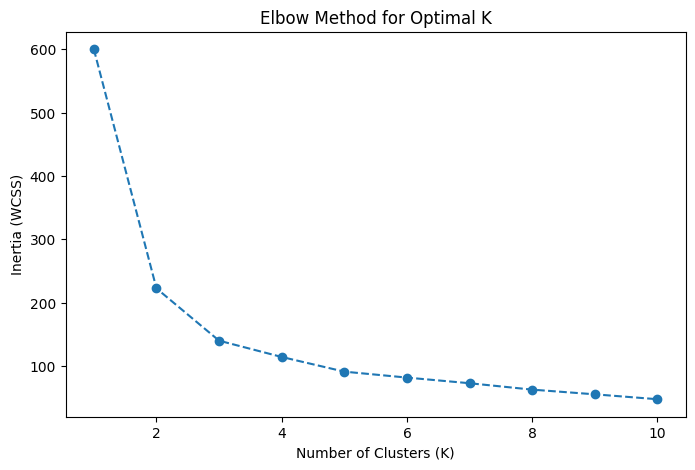

In [ ]:
# Find the best number of clusters using the Elbow Method
inertia_values = []
K_range = range(1, 11)  # Checking for 1 to 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.show()

In [ ]:
# Choosing K = 3 (since Iris dataset has 3 species)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)  # Cluster Labels

# Cluster Centers
print("Cluster Centers:\n", kmeans.cluster_centers_)

Cluster Centers:
 [[-0.05021989 -0.88337647  0.34773781  0.2815273 ]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [ 1.13597027  0.08842168  0.99615451  1.01752612]]


In [ ]:
# Silhouette Score (Higher is Better, Range: -1 to 1)
silhouette = silhouette_score(X_scaled, y_kmeans)

# Davies-Bouldin Index (Lower is Better)
davies_bouldin = davies_bouldin_score(X_scaled, y_kmeans)

# Print Evaluation Metrics
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")
print(f"Inertia (WCSS): {kmeans.inertia_:.4f}")


Silhouette Score: 0.4599
Davies-Bouldin Index: 0.8336
Inertia (WCSS): 139.8205


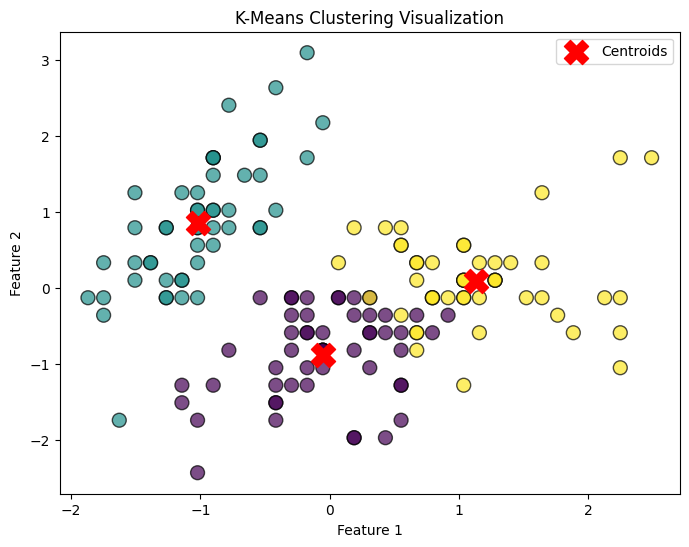

In [ ]:
# Scatter plot for visualization (Using first two features)
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis', edgecolor='k', s=100, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=300, label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering Visualization')
plt.legend()
plt.show()